In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import svm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/lizat/Downloads/income_train.csv')
# df_test = pd.read_csv('путь к тестовому файлу')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,47,Private,359461,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
26044,31,Private,147215,12th,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States,<=50K
26045,18,Private,216284,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
26046,50,Self-emp-not-inc,54261,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.576513,1.897592e+05,10.080544,1053.617437,87.988828,40.388552
std,13.642904,1.052329e+05,2.575202,7230.800656,403.629787,12.331139
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782635e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370065e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df['income'] = df['income'].apply(lambda x: np.where(x == '>50K',1,0))

In [5]:
data = df.drop(columns=['income','fnlwgt','native-country','education','occupation','relationship'])
target = df['income']

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

ct = ColumnTransformer([
      ('label', OrdinalEncoder(),
      make_column_selector(dtype_include=object))
      ],
      remainder='passthrough')

ct.fit(data)
data = ct.transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8
0,2.0,4.0,4.0,0.0,33.0,13.0,0.0,0.0,50.0
1,4.0,2.0,4.0,1.0,36.0,11.0,0.0,1887.0,50.0
2,6.0,5.0,4.0,1.0,58.0,5.0,0.0,0.0,40.0
3,4.0,2.0,4.0,1.0,21.0,11.0,0.0,0.0,46.0
4,4.0,0.0,4.0,1.0,27.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
26043,4.0,2.0,4.0,1.0,47.0,13.0,0.0,0.0,40.0
26044,4.0,0.0,4.0,0.0,31.0,8.0,0.0,0.0,21.0
26045,4.0,4.0,4.0,0.0,18.0,7.0,0.0,0.0,20.0
26046,6.0,2.0,4.0,1.0,50.0,9.0,0.0,0.0,84.0


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
# попробуем запустить с параметрами наугад

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features='sqrt', min_samples_leaf=5, n_estimators=100) 
forest.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.883
Правильность на тестовом наборе: 0.856


In [9]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', RandomForestClassifier())])

n_est=np.array([10, 30, 50, 100])
max_features=['log2','sqrt']
min_samples_leaf = np.array([1,5])

param_grid =[
    {'preprocessing': [RobustScaler()], 
     'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': n_est,
     'classifier__max_features': max_features,
     'classifier__min_samples_leaf': min_samples_leaf
     }
]

grid = GridSearchCV(pipe, param_grid, cv=2, return_train_score=True, scoring = 'accuracy')
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
4
------------------------------------
Словарь с параметрами для лучшего решения:
{'classifier': RandomForestClassifier(max_features='log2', min_samples_leaf=5, n_estimators=10), 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 10, 'preprocessing': RobustScaler()}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.857391

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier',
                 RandomForestClassifier(max_features='log2', min_samples_leaf=5,
                                        n_estimators=10))])



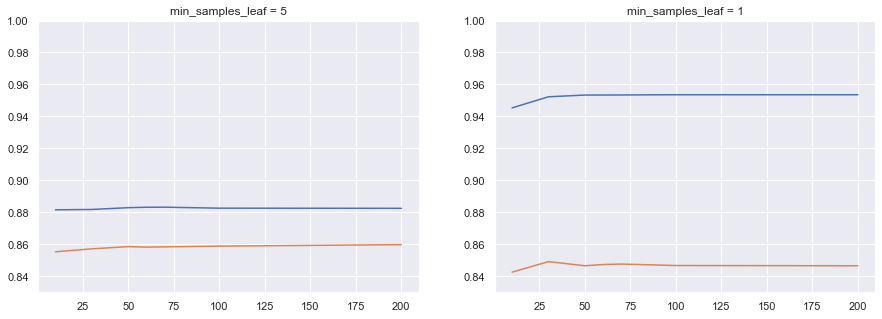

In [10]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [10, 30, 50, 60, 70, 100, 200]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n , max_features='sqrt', min_samples_leaf = 5, random_state=0)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators: # органичение роста дерева улучшает ситуацию на тесте, но сильно ухудшает на тренировочно
    rf = RandomForestClassifier(n_estimators= n, max_features='sqrt', random_state=0)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122) 
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.83, 1)
ax1.title.set_text('min_samples_leaf = 5')
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.83, 1)
ax2.title.set_text('min_samples_leaf = 1');

In [11]:
# попробуем запустить с параметрами наугад

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, min_samples_split=5, n_estimators=100, random_state=12)
gbrt.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.864
Правильность на тестовом наборе: 0.861


In [12]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', GradientBoostingClassifier())])

n_est=np.array([100, 200, 300, 500, 750, 1000])
rate=np.array([0.01, 0.05, 0.1])

param_grid =[
    {'preprocessing': [RobustScaler()], 
     'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_est,
     'classifier__learning_rate': rate
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, scoring = 'accuracy')
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Индекс лучшего результата:\n{}".format(grid.best_index_))
print("------------------------------------")
print("Словарь с параметрами для лучшего решения:\n{}\n".format(grid.best_params_))
print("------------------------------------")
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_))
print("------------------------------------")
print("Настройки лучшей модели в контейнере:\n{}\n".format(grid.best_estimator_))

----------------- Обучили и тестировали -------------------
Индекс лучшего результата:
15
------------------------------------
Словарь с параметрами для лучшего решения:
{'classifier': GradientBoostingClassifier(n_estimators=500), 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 500, 'preprocessing': RobustScaler()}

------------------------------------
Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.865172

------------------------------------
Настройки лучшей модели в контейнере:
Pipeline(steps=[('preprocessing', RobustScaler()),
                ('classifier', GradientBoostingClassifier(n_estimators=500))])



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) # снова делим выборку

# обучаем модель с нуля

scaler = RobustScaler()
scaler.fit(X_train) # Перемасштабирование

X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор (преобразовали данные)
X_test_scaled = scaler.transform(X_test)

gbrt = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500) # на бустинге скор был повыше, поэтому берем его
gbrt.fit(X_train_scaled, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train_scaled, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.879
Правильность на тестовом наборе: 0.865


In [17]:
### Слот для внешних данных (которые подгрузили в блоке 1)

# df_test['income'] = df_test['income'].apply(lambda x: np.where(x == '>50K',1,0))

# X_test = df_test.drop(columns=['income','fnlwgt','native-country','education','occupation','relationship'])
# X_test = ct.transform(X_test)
# X_test = pd.DataFrame(X_test)
# X_test_scaled = scaler.transform(X_test)

# y_best=gbrt.predict(X_test_scaled) 

# print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train_scaled, y_train)))
# print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test_scaled, df_test['income'])))

In [18]:
# y_best